In [1]:
%matplotlib inline
import geopandas

import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

In [ ]:
us = geopandas.read_file("data/election.gpkg")
us = us[us.state != "DC"]
us['Democrat'] = us.dem / us.votes * 100
us['Republican'] = us.gop / us.votes * 100

In [ ]:
w3 = WeaveUnit(spacing = 20000, aspect = 1/3, weave_type = "plain", n = 1, 
               strands = "a|c", crs = us.crs).transform_rotate(-45)


<Axes: >

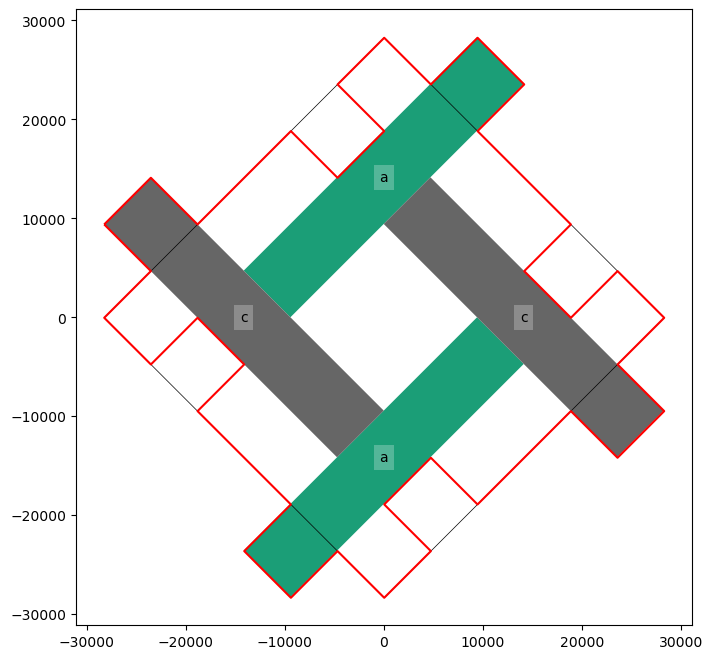

In [22]:
w3.plot(show_ids = True)

In [23]:
tiling = Tiling(w3, us)

In [24]:
election_map = tiling.get_tiled_map(join_on_prototiles = False)

In [30]:
election_map.ids_to_map = list("ac")
election_map.vars_to_map = ["Democrat", "Republican"]
election_map.colors_to_use = ["Blues", "Reds"]
election_map.schemes_to_use = "equalinterval"
election_map.n_classes = 0

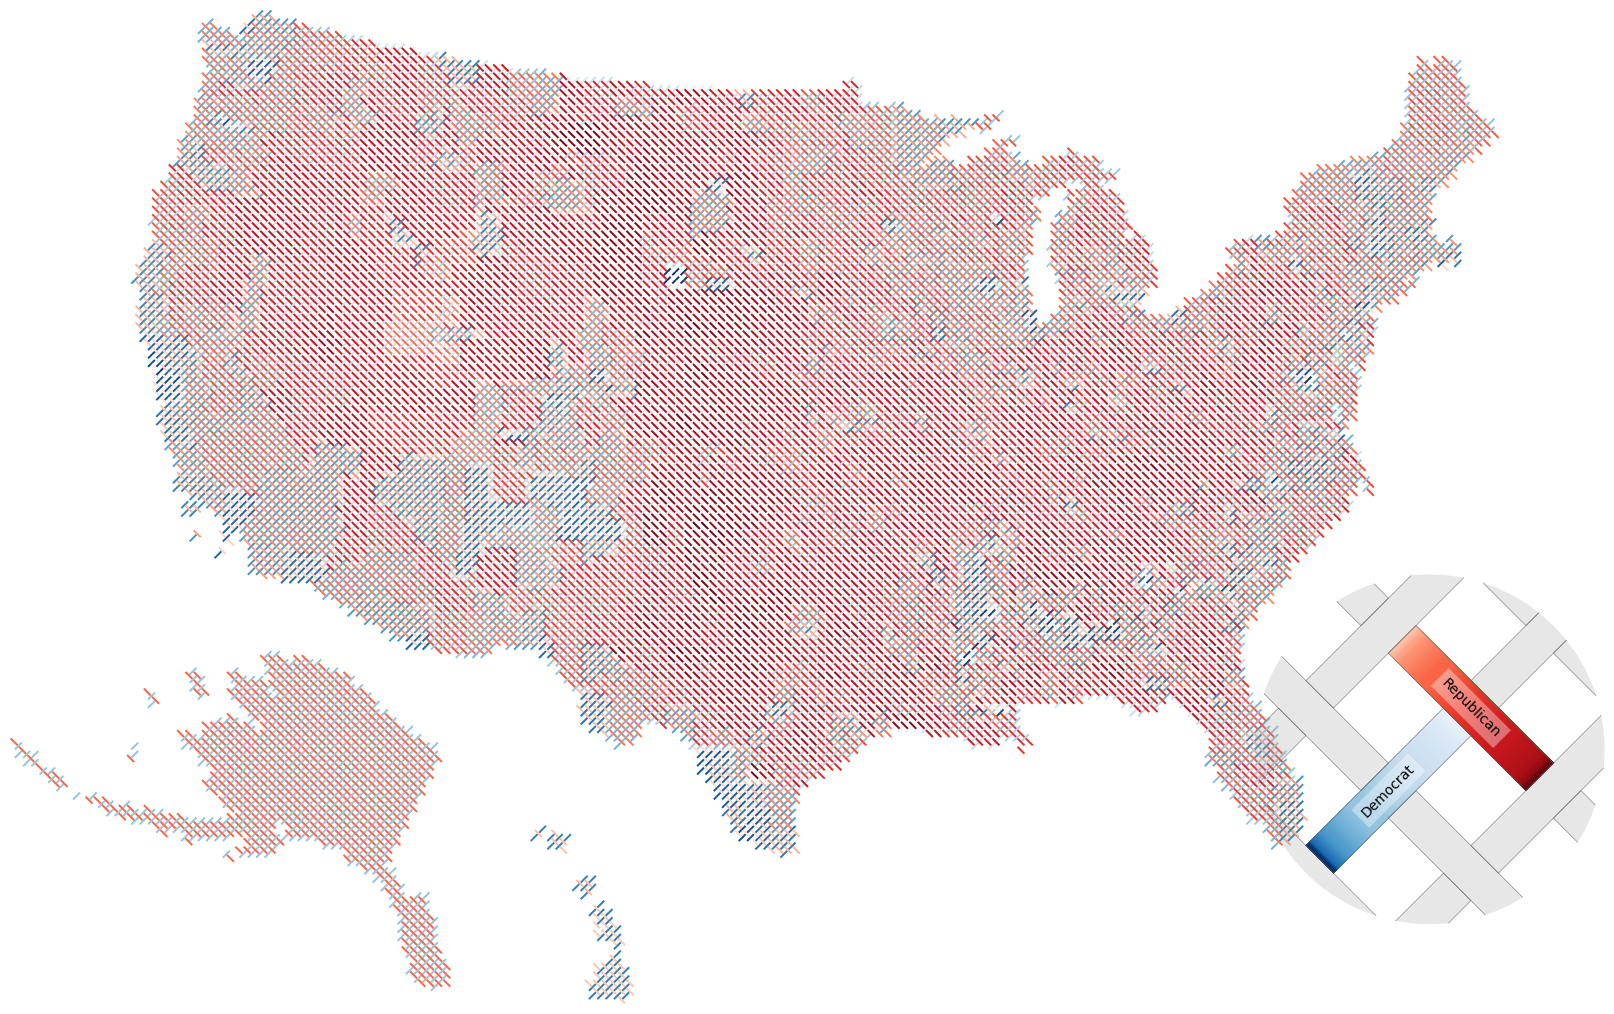

In [31]:
fig = election_map.render(legend = True, dpi = 90, use_ellipse = True,
                          legend_dx = -0.1, legend_dy = -0.425)
# fig.savefig("NZCS-Aug-2022/slides/images/election-2016-weave.png", dpi = 90)

In [27]:
election_map.to_file("election-counties.gpkg")

In [10]:
election_map._colourspecs

{'a': {'column': 'Democrat',
  'cmap': 'Blues',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5},
 'b': {'column': 'Green',
  'cmap': 'Greens',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5},
 'c': {'column': 'Republican',
  'cmap': 'Reds',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5},
 'd': {'column': 'Libertarian',
  'cmap': 'Purples',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5}}